<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/02_Images_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 05. Filtering

A képek szűrése alapvető eljárás a digitális képfeldolgozásban. Az alapgondolat az, hogy konvolúciót hajtunk végre a képen. A kép minden egyes részén végigpásztázunk és valamilyen műveletet végzünk az adott régióban. Erről később részletesen, ez most csak szövegkitöltés. Ezen az elven működik az élsimítás, az élkiemelés.

Ebben a példában a  ```skimage.filter``` könyvtár és a ```skimage.morphology``` könyvtár használatával mutatok be néhány példát.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import imageio
import skimage
import skimage.io
import skimage.morphology

from numba import jit, prange

from scipy.signal import convolve2d

import warnings
warnings.filterwarnings('ignore')

## Lineáris szűrők

### 1 Elmosás, vagy élsimítás
Ez az eljárás speciális módon átlagolja az adott képpont és a környezetében lévő képpontokat. Az konvolúciós mátrix Gauss (normál) eloszlást követ. Ez azt jelenti, hogy a képponthoz közeli képpontokat nagyobb súllyal veszi figyelembe mint a távolabbiakat. A súlyok amelyeket a konvolúciónál alkalmazunk Gauss-eloszlást követ. A paraméter általában a konvolúciós mátrix mérete.

Az eljárás eredményét könnyen be lehet mutatni, ha egy kép ahol az összes képpont 0 intenzitású és de egy képpont maximum intenzitású.

Ezen a képen alkalmazva az élsimítást a következő eredményt kapjuk.



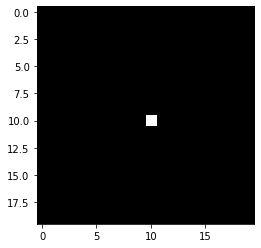

In [ ]:
single_dot = np.zeros((20,20))
single_dot[10,10] = 1
plt.imshow(single_dot, cmap = 'gray');

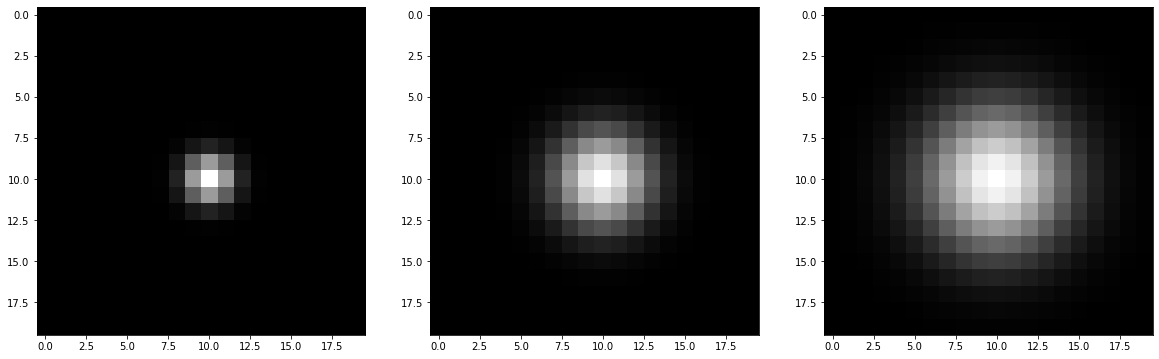

In [ ]:
filtered1 = skimage.filters.gaussian(single_dot, sigma=1)
filtered2 = skimage.filters.gaussian(single_dot, sigma=2)
filtered3 = skimage.filters.gaussian(single_dot, sigma=3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.imshow(filtered1, cmap = 'gray');
ax2.imshow(filtered2, cmap = 'gray');
ax3.imshow(filtered3, cmap = 'gray');

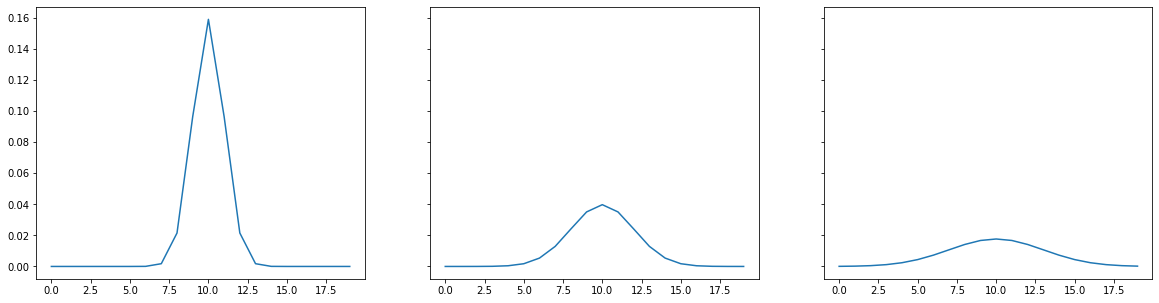

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (20, 5))

ax1.plot(filtered1[10,:]);
ax2.plot(filtered2[10,:]);
ax3.plot(filtered3[10,:]);

Fent látható, hogy a különböző méretű élsimítások hatására, hogyan változott meg a képpontok intenzitása és azok gyakorisága.

In [ ]:
image_stack = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true')

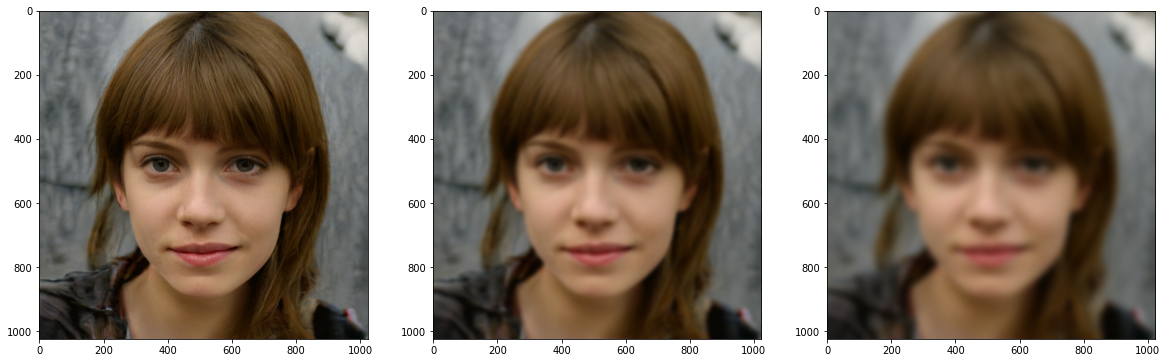

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

blur1 = skimage.filters.gaussian(image_stack, sigma=5, multichannel=True)
blur2 = skimage.filters.gaussian(image_stack, sigma=10, multichannel=True)

ax1.imshow(image_stack);
ax2.imshow(blur1);
ax3.imshow(blur2);

## Zajcsökkentés

Élsimítással gyakran a zajt, az oda nem illő képpontokat is el tudjuk távolítani.
Persze ez a módszer jelentős információvesztéssel jár.

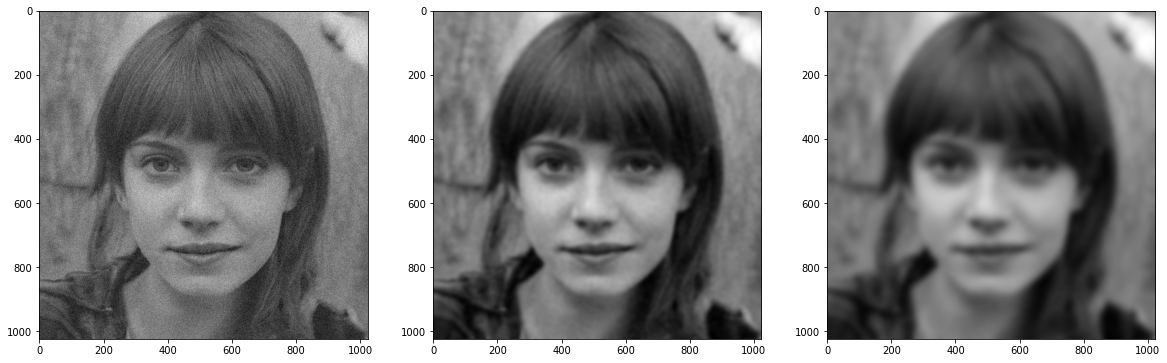

In [ ]:
x = image_stack.shape[0]
y = image_stack.shape[1]

noisy = image_stack[:,:,1] + 100*np.random.rand(x,y)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.imshow(noisy, cmap = 'gray');
ax2.imshow(skimage.filters.gaussian(noisy, sigma=5), cmap = 'gray');
ax3.imshow(skimage.filters.gaussian(noisy, sigma=10), cmap = 'gray');



## Medián szűrők

A medián szűrő is szomszédos képpontok informáicója alapján végez számítást, például egy 5x5 régióban kiszámolja azt az értéket ami alatt és fölött az esetek fele helyezkedik el és ezt az értéket fogja behelyettesíteni az adott képpontba.

Ez akkor lehet különösen hasznos, ha nagyon kiugró értékek vannak az adott régióban.

In [ ]:
image_noisy = skimage.util.random_noise(image_stack, mode='s&p')

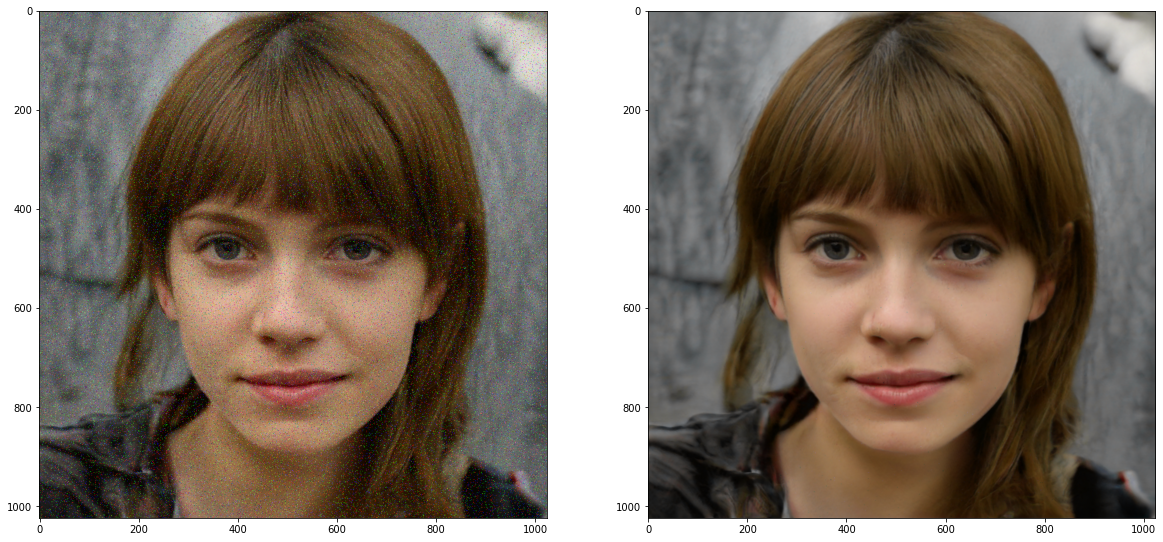

In [ ]:

filtered_median = skimage.filters.median(image_noisy)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.imshow(image_noisy, cmap = 'gray');
ax2.imshow(filtered_median, cmap = 'gray');


A bal oldali képet mesterséges zajjal terheltem, a jobboldali kép pedig ennek a képnek a 3x3 medián szűrővel modosított változata.

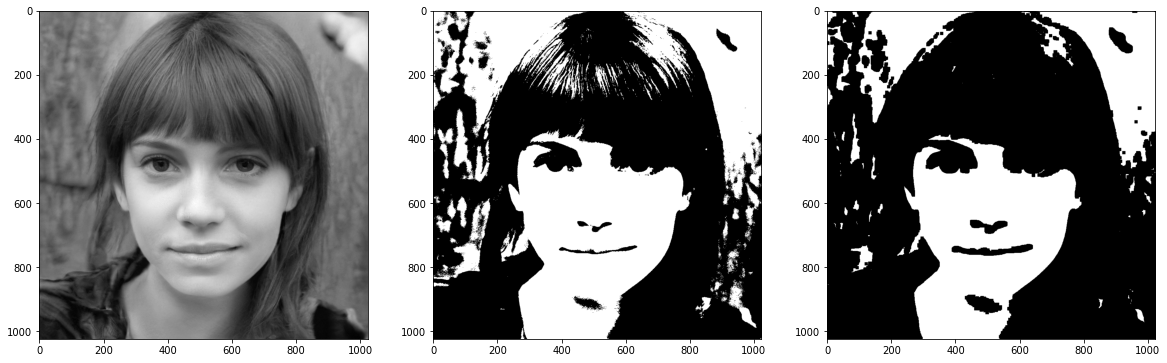

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

r = image_stack[:,:,0]
g = image_stack[:,:,1]
b = image_stack[:,:,2]

mask_r = r > skimage.filters.threshold_otsu(r)
mask_g = g > skimage.filters.threshold_otsu(g)
mask_b = b > skimage.filters.threshold_otsu(b)

eroded = skimage.morphology.binary_erosion(mask_r, selem=np.ones((10,10)))

ax1.imshow(r, cmap = 'gray')
ax2.imshow(mask_r, cmap = 'gray')
ax3.imshow(eroded, cmap = 'gray')

plt.show()


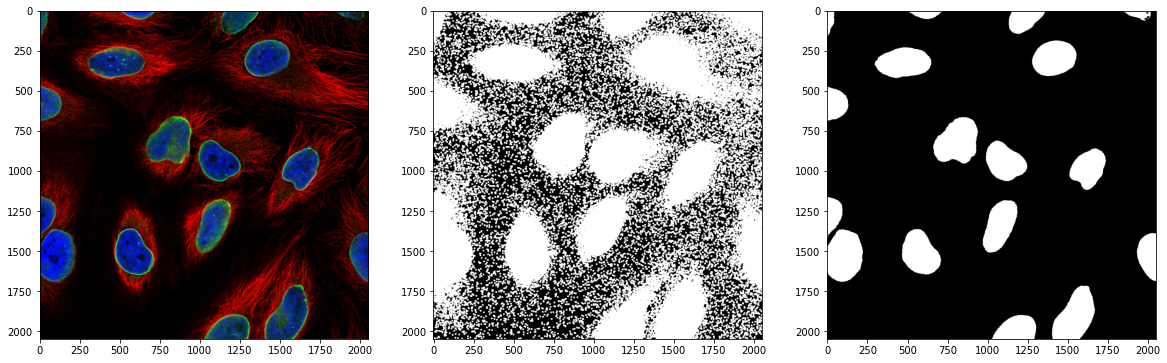

In [ ]:

image_stack = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/nature1.tif?raw=true')
image_nuclei = image_stack[:,:,2]

influence_region = np.ones((10,10))
dilated = skimage.morphology.binary_dilation(image_nuclei, selem=influence_region)
eroded  = skimage.morphology.binary_erosion(image_nuclei, selem=np.ones((10,10)))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.imshow(image_stack, cmap = 'gray')
ax2.imshow(dilated, cmap = 'gray')
ax3.imshow(eroded, cmap = 'gray')

plt.show()

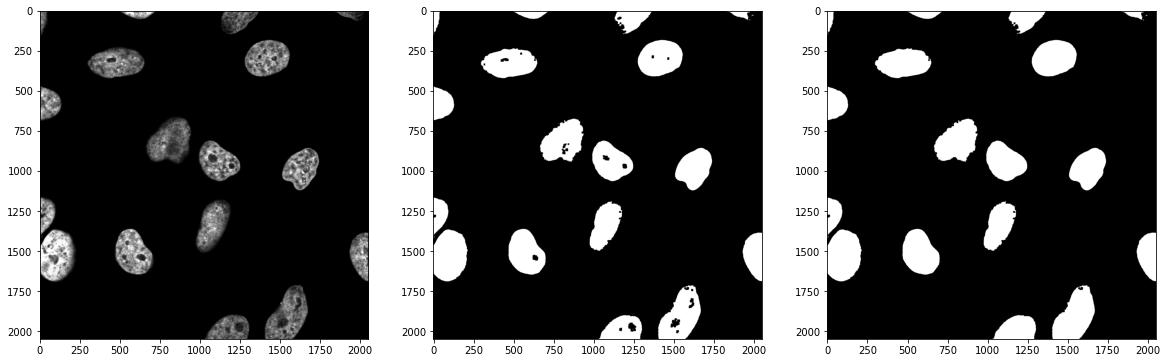

In [ ]:
import scipy.ndimage as ndi

mask = image_nuclei > skimage.filters.threshold_otsu(image_nuclei)

image_closed = skimage.morphology.binary_closing(mask, selem=influence_region)
image_fill   = ndi.binary_fill_holes(image_closed, skimage.morphology.disk(5))


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.imshow(image_nuclei, cmap = 'gray')
ax2.imshow(image_closed, cmap = 'gray')
ax3.imshow(image_fill, cmap = 'gray')

plt.show()

In [ ]:
#@title
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def summary(image):
	if image.ndim == 2:
		SUM = ('\n{0:>10s}: {1:>15.4f}').format('min', np.amin(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('1st Quar', np.percentile(image, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('median', np.median(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('mean', np.mean(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('3rd Quar', np.percentile(image, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('max', np.amax(image))
		SUM += ('\n{0:>10s}: {1:>15.4f}').format('sigma', np.std(image))
	elif image.ndim == 3:
		R = image[:,:,0]
		G = image[:,:,1]
		B = image[:,:,2]
		SUM = ('{0:>%ss} {1:>%ss} {2:>%ss}' % (27, 15, 15)).format('R', 'G', 'B')
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('min', np.amin(R), np.amin(G), np.amin(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('1st Quar', np.percentile(R, 25), np.percentile(G, 25), np.percentile(B, 25))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('median', np.median(R), np.median(G), np.median(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('mean', np.mean(R), np.mean(G), np.mean(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('3rd Quar', np.percentile(R, 75), np.percentile(G, 75), np.percentile(B, 75))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('max', np.amax(R), np.amax(G), np.amax(B))
		SUM += ('\n{0:>10s}: {1:>15.4f} {2:>15.4f} {3:>15.4f}').format('sigma', np.std(R), np.std(G), np.std(B))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	print(SUM)

def histogram(image, **kwargs):
	x, y = (3*(256 + 100), 256) if 'dims' not in kwargs else kwargs['dims']
	dpi = 72 if 'dpi' not in kwargs else kwargs['dpi']
	bins = 256 if 'bins' not in kwargs else kwargs['bins']
	rw = 0.95 if 'rw' not in kwargs else kwargs['rw']
	interval = [0, 255] if 'interval' not in kwargs else kwargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	
	gs1 = gridspec.GridSpec(1, 3)
	gs1.update(	left=0,
				right=1,
				bottom=0,
				top=1,
				wspace=0,
				hspace=0)
	ax1 = plt.subplot(gs1[:, 0])
	ax1.axis('off')
	ax2 = plt.subplot(gs1[:, 1:])

	img = image.copy()

	if img.ndim == 2:
		ax1.imshow(	img,
					cmap='gray',
					vmin=interval[0],
					vmax=interval[1])
		ax2.hist(	img.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					color='k')
	elif img.ndim == 3:
		imgo = (img - interval[0])/(interval[1] - interval[0])
		imgo[imgo < 0] = 0
		imgo[imgo > 1] = 1

		R = img[:,:,0]
		G = img[:,:,1]
		B = img[:,:,2]

		ax1.imshow(imgo)
		ax2.hist(	R.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(1, 0, 0.25, 0.5))
		ax2.hist(	G.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0.25, 1, 0, 0.5))
		ax2.hist(	B.ravel(),
					bins=bins,
					range=interval,
					rwidth=rw,
					fc=(0, 0.25, 1, 0.5))
	else:
		raise ValueError('Invalid argument! It is not an image..')
	plt.show()

def panel(images, gspec, **kargs):
	M, N = gspec

	x, y = (1024, 512) if 'dims' not in kargs else kargs['dims']
	dpi = 72 if 'dpi' not in kargs else kargs['dpi']
	texts = [] if 'texts' not in kargs else kargs['texts']
	tx, ty = (10, 10) if 'text_pos' not in kargs else kargs['text_pos']
	tc = 'white' if 'text_color' not in kargs else kargs['text_color']
	ts = 12 if 'text_size' not in kargs else kargs['text_size']
	interval = [0, 255] if 'interval' not in kargs else kargs['interval']

	fig = plt.figure(figsize=(x/dpi, y/dpi))
	gs = gridspec.GridSpec(N, M)
	gs.update(	left=0, right=1,
                bottom=0, top=1,
                wspace=0, hspace=0)
	images = (images - interval[0])/(interval[1] - interval[0])
	images[images < 0] = 0
	images[images > 1] = 1
	for n in range(N):
		for m in range(M):
			ax = plt.subplot(gs[n, m])
			ax.axis('off')
			try:
				image = images[n*M + m]
			except:
				image = images[0]*0
			if image.ndim == 2:
				ax.imshow(image, cmap='gray')
			else:
				ax.imshow(image)
			try:
				text = texts[n*M + m]
			except:
				text = ''
			ax.text(	tx, ty, text,
						color=tc, size=ts,
						horizontalalignment='left',
						verticalalignment='top')
	plt.show()

# A Sobel operator
---
A [Sobel–Feldman](https://en.wikipedia.org/wiki/Sobel_operator#Extension_to_other_dimensions) egy gradiens operátor ami két különálló konvolúcióból áll.

A két operátor:

$$ \large
G_x = 
\begin{bmatrix}
1 \\
2 \\
1
\end{bmatrix}
* \left(
\begin{bmatrix}
+1 & 0 & -1
\end{bmatrix}
*I \right)
=
\begin{bmatrix}
+1 & 0 & -1 \\
+2 & 0 & -2 \\
+1 & 0 & -1
\end{bmatrix}
* I
$$


$$ \large
G_y = 
\begin{bmatrix}
+1 \\
0 \\
-1
\end{bmatrix}
* \left(
\begin{bmatrix}
1 & 2 & 1
\end{bmatrix}
*I \right)
=
\begin{bmatrix}
+1 & +2 & +1 \\
0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}
* I
$$

In [ ]:
# Triangle filter
ht = np.array([[1, 2, 1]])

# Central difference
hc = np.array([[1, 0, -1]])

# A Sobel operator így állítható elő a fenti kettőből
Hx = ht.T*hc
Hy = hc.T*ht

print(Hx, end=' Hx\n\n')
print(Hy, end=' Hy\n\n')

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]] Hx

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] Hy



In [ ]:
@jit(nopython=True, parallel=True)
def convolve(x, h):
    xh, xw = x.shape
    hh, hw = h.shape
    # Kernel
    rh, rw = np.array(h.shape)//2
    # Init output
    output = np.zeros(x.shape)
    for n1 in prange(rh, xh-rh):
        for n2 in prange(rw, xw-rw):
            value = 0
            for k1 in prange(hh):
                for k2 in prange(hw):
                    value += h[k1, k2]*x[n1 + k1 - rh, n2 + k2 - rw]
            output[n1, n2] = value
    return output

## Sobel operator és spatial szűrés - erre a spatial szóra nem találok jó magyar megfelelőt
---
A *Sobel operator* mint spatial szűrő egy *diszkrét konvolúciókétn* fogható fel.

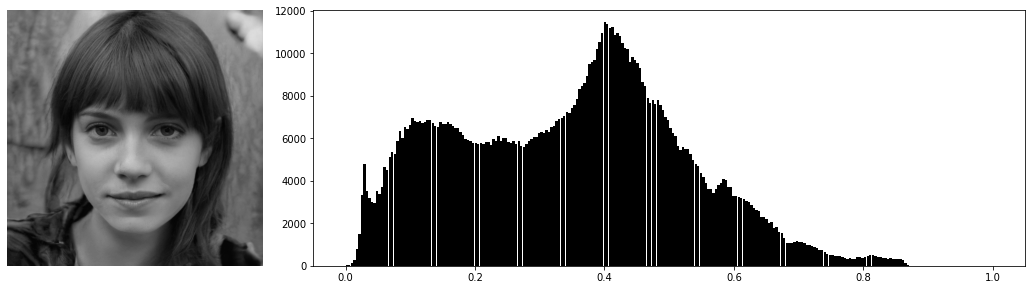

In [ ]:
# Képek betöltése és normalizálása [0, 1]
A = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman4.png?raw=true')/255

B = imageio.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman5.png?raw=true')/255


img_in = A
img_in = np.median(img_in, axis=2)
histogram(img_in, interval=[0, 1])

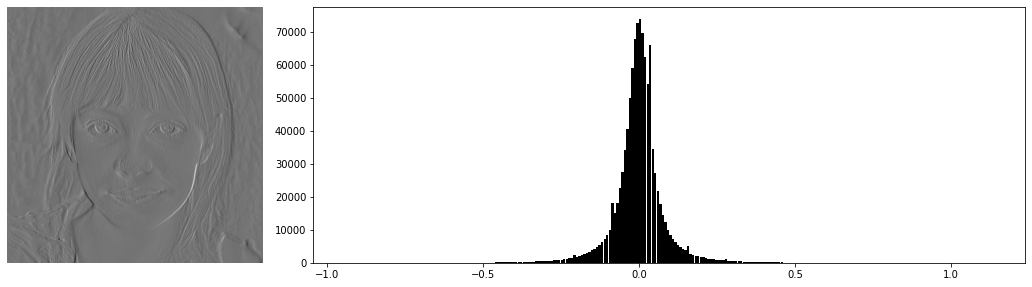

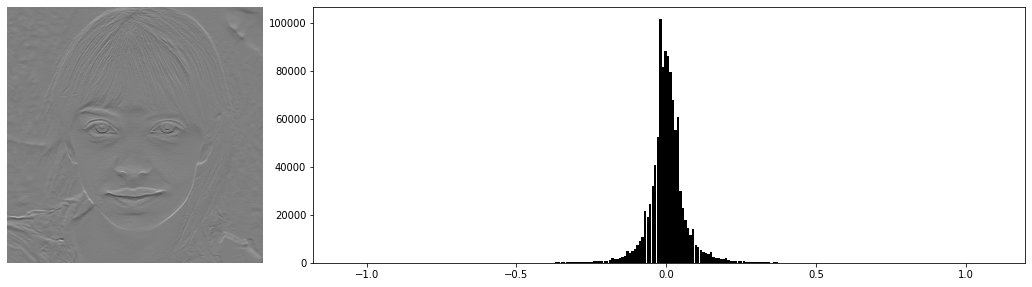

In [ ]:
r = 1

# Zero paddig - nincsek szélek
img_pad = np.pad(
    img_in,
    ((r, r), (r, r)),
    'edge'
)

# Konvolúció
Gx = convolve(img_pad, Hx)[r:-r, r:-r]
histogram(Gx,interval=[Gx.min(), Gx.max()])

Gy = convolve(img_pad, Hy)[r:-r, r:-r]
histogram(Gy, interval=[Gy.min(), Gy.max()])

A *gradiens nagysága*:

$$ \large
G = \sqrt{G_x^2+G_y^2}
$$

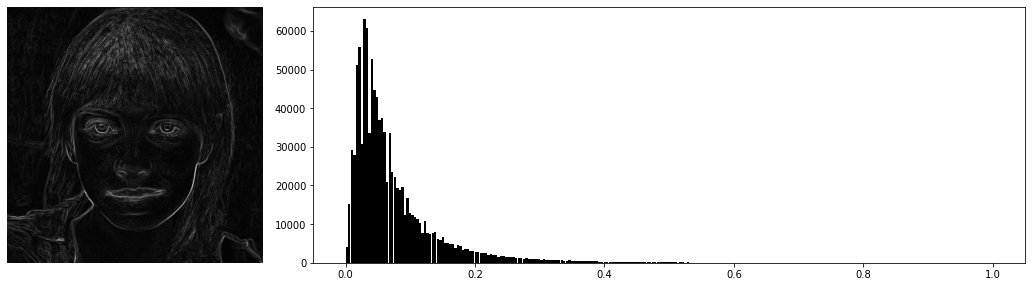

In [ ]:
G = (Gx**2 + Gy**2)**0.5
histogram(G, interval=[0, 1])

A *gradiens iránya* pedig:

$$ \large
\Theta = \arctan\left(\frac{G_y}{G_x}\right)
$$

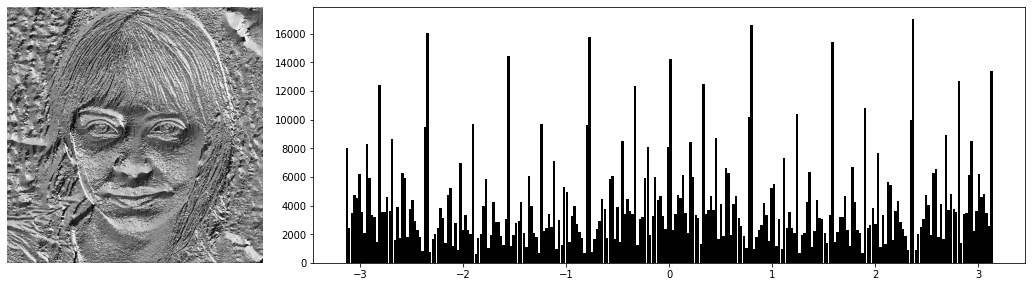

In [ ]:
Theta = np.arctan2(Gy, Gx)
histogram(Theta, interval=[Theta.min(), Theta.max()])

## Ugyan ez különböző operátor méretekkel (3x3, 5x5, stb)
---

In [ ]:
def SobelOperator(radius, direction="x"):
    size = 2*radius + 1
    
    # Triangle filter
    ht = np.arange(size) + 1
    ht[size//2:] = ht[::-1][size//2:]
    ht = ht[np.newaxis]
    
    # Central difference
    hc = np.arange(size)
    hc = hc[::-1] - size//2
    hc = hc[np.newaxis]
    
    # Sobel operator
    if(direction == "y"):
        return hc.T*ht
    return ht.T*hc

print(SobelOperator(2, "x"), end=' Hx 5x5\n\n')
print(SobelOperator(2, "y"), end=' Hy 5x5\n\n')

[[ 2  1  0 -1 -2]
 [ 4  2  0 -2 -4]
 [ 6  3  0 -3 -6]
 [ 4  2  0 -2 -4]
 [ 2  1  0 -1 -2]] Hx 5x5

[[ 2  4  6  4  2]
 [ 1  2  3  2  1]
 [ 0  0  0  0  0]
 [-1 -2 -3 -2 -1]
 [-2 -4 -6 -4 -2]] Hy 5x5



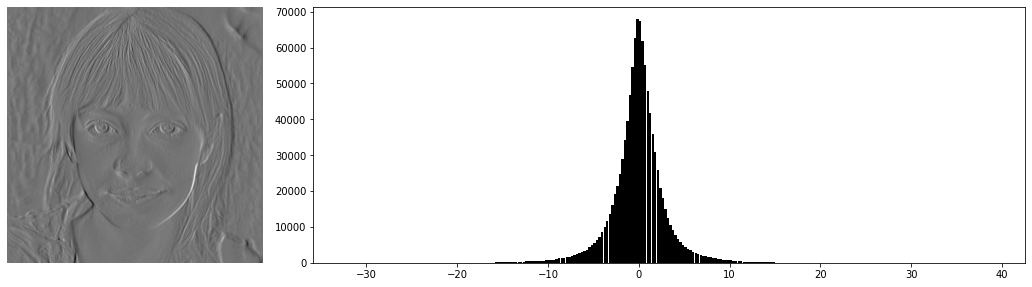

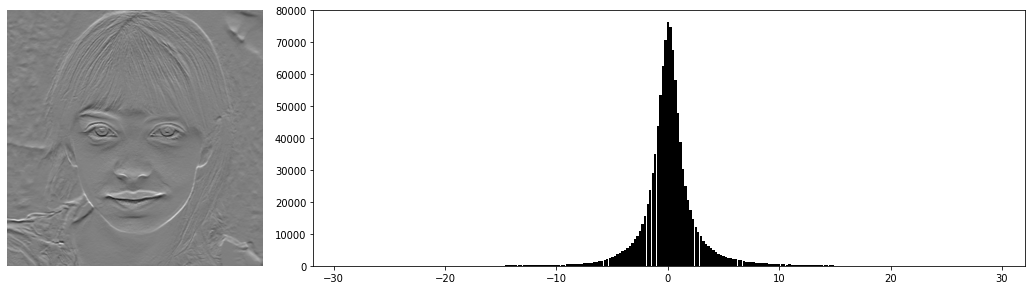

In [ ]:
r = 3

# Padding zero
img_pad = np.pad(
    img_in,
    ((r, r), (r, r)),
    'edge'
)

# Convolution
Gx = convolve(img_pad, SobelOperator(r, "x"))[r:-r, r:-r]
histogram(Gx,interval=[Gx.min(), Gx.max()])

Gy = convolve(img_pad, SobelOperator(r, "y"))[r:-r, r:-r]
histogram(Gy, interval=[Gy.min(), Gy.max()])

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/JoDeMiro/OpenCVTutorial/raw/main/woman2.jpg

--2021-06-10 11:40:14--  https://github.com/JoDeMiro/OpenCVTutorial/raw/main/woman2.jpg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoDeMiro/OpenCVTutorial/main/woman2.jpg [following]
--2021-06-10 11:40:14--  https://raw.githubusercontent.com/JoDeMiro/OpenCVTutorial/main/woman2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 778477 (760K) [image/jpeg]
Saving to: ‘woman2.jpg’

woman2.jpg          100%[===================>] 760.23K  --.-KB/s    in 0.03s   

2021-06-10 11:40:15 (26.0 MB/s) - ‘woman2.jpg’ saved [778477/778477]



In [ ]:
img = cv2.imread('woman2.jpg')

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
print(type(rgb))
print(rgb.shape)

<class 'numpy.ndarray'>
(1024, 1024, 3)


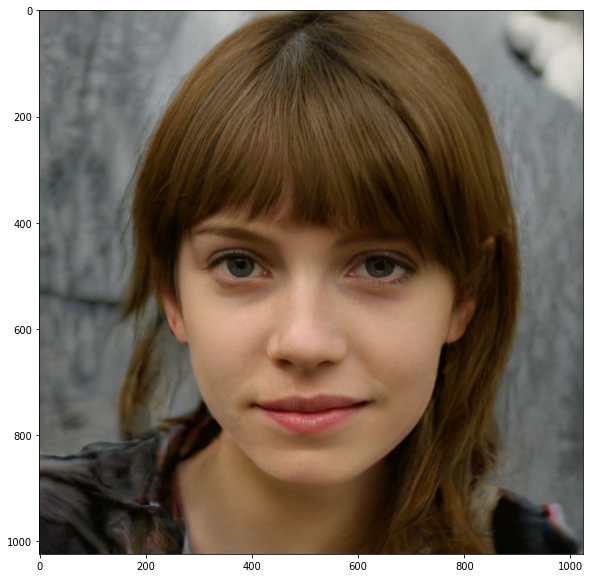

In [ ]:
plt.subplots(figsize=(10,10))
plt.imshow(rgb)
plt.show()

## Kép színcsatornánként (red, green, blue)

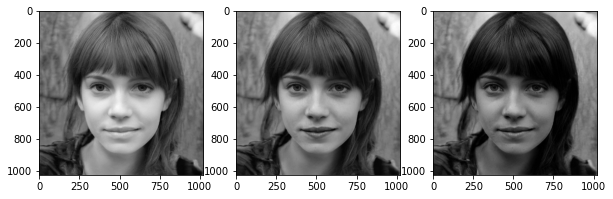

In [ ]:
r, g, b = cv2.split(rgb)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,6))
ax1.imshow(r, cmap='gray')
ax2.imshow(g, cmap='gray')
ax3.imshow(b, cmap='gray')

plt.show()


## Histogram színcsatornánként

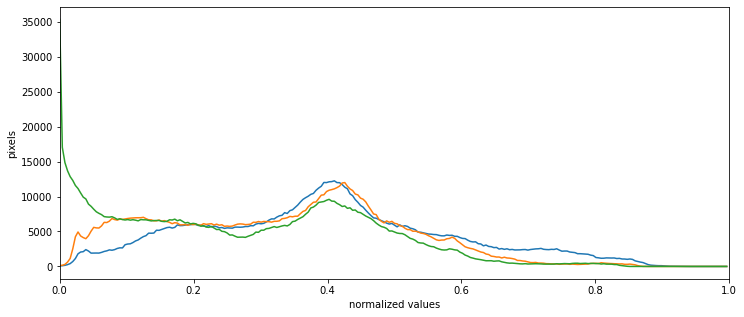

In [ ]:

r_n = r/255
g_n = g/255
b_n = b/255

histogram_r, bin_edges_r = np.histogram(r_n, bins=256, range=(0, 1))
histogram_g, bin_edges_g = np.histogram(g_n, bins=256, range=(0, 1))
histogram_b, bin_edges_b = np.histogram(b_n, bins=256, range=(0, 1))

plt.figure(figsize=(12, 5))
plt.xlabel("normalized values")
plt.ylabel("pixels")
plt.xlim([0.0, 1])

plt.plot(bin_edges_r[0:-1], histogram_r)
plt.plot(bin_edges_g[0:-1], histogram_g)
plt.plot(bin_edges_b[0:-1], histogram_b)
plt.show()

## Hisztogram normalizáció nélkül az eredeti adatokon

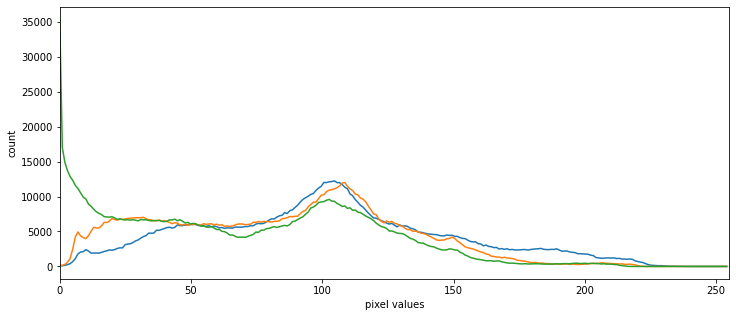

In [ ]:

histogram_r, bin_edges_r = np.histogram(r, bins=256, range=(0, 255))
histogram_g, bin_edges_g = np.histogram(g, bins=256, range=(0, 255))
histogram_b, bin_edges_b = np.histogram(b, bins=256, range=(0, 255))

plt.figure(figsize=(12, 5))
plt.xlabel("pixel values")
plt.ylabel("count")
plt.xlim([0.0, 255])

plt.plot(bin_edges_r[0:-1], histogram_r)
plt.plot(bin_edges_g[0:-1], histogram_g)
plt.plot(bin_edges_b[0:-1], histogram_b)
plt.show()

## Konvolúció scipy könyvtár convolve2d segítségével

In [ ]:
from skimage import data, io
from scipy.signal import convolve2d

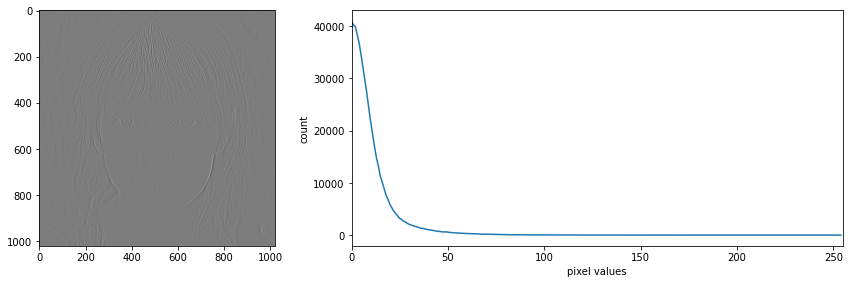

In [ ]:
# Convolution with basic vertical edge detectiong kernel

kernel = np.array([[-1,1, 1,-1],
                  [-1, 1, 1,-1],
                  [-1, 1, 1,-1],
                  [-1, 1, 1,-1]])

# Convolved image
new_images = convolve2d(r, kernel, mode = 'valid')

# Histogram of convolved image
histogram_r, bin_edges_r = np.histogram(new_images, bins=256, range=(0, 255))

# Two column plot (image, histogram)
fig, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 2]}, figsize=(12, 4))
a0.imshow(new_images, cmap = 'gray');
a1.plot(bin_edges_r[0:-1], histogram_r)
a1.set_xlabel("pixel values")
a1.set_ylabel("count")
a1.set_xlim([0.0, 255])

fig.tight_layout()

## Konvolúció a NumPy könyvtár segítségével

Alább a konvolúciós függvény látható ```convolve``` néven, paraméterként x, egy képet, és h egy kernelt vár. Visszatérési értéke egy N.x.M mátrix.



In [ ]:
@jit(nopython=True, parallel=True)
def convolve(x, h):
    xh, xw = x.shape
    hh, hw = h.shape
    # Kernel
    rh, rw = np.array(h.shape)//2
    # Init output
    output = np.zeros(x.shape)
    for n1 in prange(rh, xh-rh):
        for n2 in prange(rw, xw-rw):
            value = 0
            for k1 in prange(hh):
                for k2 in prange(hw):
                    value += h[k1, k2]*x[n1 + k1 - rh, n2 + k2 - rw]
            output[n1, n2] = value
    return output

[[1 2 3]
 [1 2 3]
 [1 2 3]]


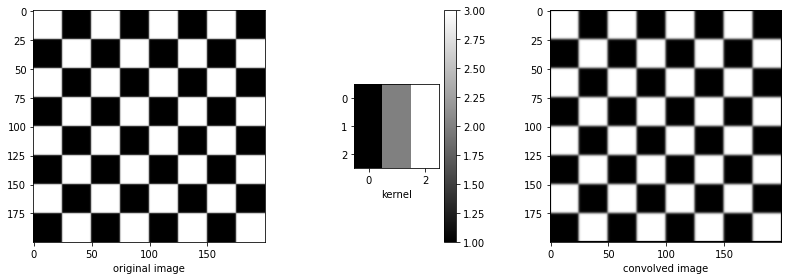

In [ ]:
kernel = np.array([[1,2,3],
                   [1,2,3],
                   [1,2,3]])

#------------------------------------------------------------------------------
print(kernel)

# Original image
image = skimage.data.checkerboard()

# Convolved image
new_image = convolve(table, kernel)

# Histogram of convolved image
histogram_r, bin_edges_r = np.histogram(new_image, bins=256, range=(0, 255))

# Two column plot (image, histogram)
fig, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1, 3]}, figsize=(12, 4))
a0.imshow(image, cmap = 'gray')
a0.set_xlabel("original image")
a1.imshow(kernel, cmap = 'gray')
a1.set_xlabel("kernel")

pos = a1.imshow(kernel, cmap = 'gray')
fig.colorbar(pos, ax=a1)

a2.imshow(new_image, cmap = 'gray')
a2.set_xlabel("convolved image")
fig.tight_layout()

[[-1  1  1 -1]
 [-1  1  1 -1]
 [-1  1  1 -1]
 [-1  1  1 -1]]


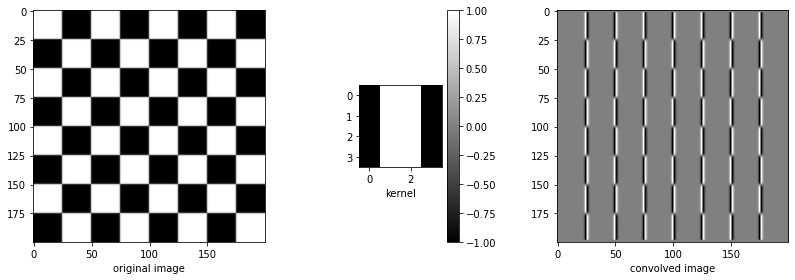

In [ ]:
# Convolution with basic vertical edge detectiong kernel
kernel = np.array([[-1,1, 1,-1],
                  [-1, 1, 1,-1],
                  [-1, 1, 1,-1],
                  [-1, 1, 1,-1]])

#------------------------------------------------------------------------------
print(kernel)

# Original image
image = skimage.data.checkerboard()

# Convolved image
new_image = convolve(table, kernel)

# Histogram of convolved image
histogram_r, bin_edges_r = np.histogram(new_image, bins=256, range=(0, 255))

# Two column plot (image, histogram)
fig, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1, 3]}, figsize=(12, 4))
a0.imshow(image, cmap = 'gray')
a0.set_xlabel("original image")
a1.imshow(kernel, cmap = 'gray')
a1.set_xlabel("kernel")

pos = a1.imshow(kernel, cmap = 'gray')
fig.colorbar(pos, ax=a1)

a2.imshow(new_image, cmap = 'gray')
a2.set_xlabel("convolved image")
fig.tight_layout()

[[ 2  1  0 -1 -2]
 [ 4  2  0 -2 -4]
 [ 6  3  0 -3 -6]
 [ 4  2  0 -2 -4]
 [ 2  1  0 -1 -2]]


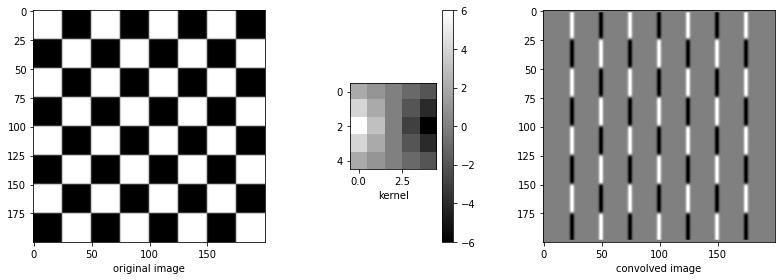

In [ ]:
# Set kernel
a = np.array([[1, 2, 3, 2, 1]])
b = np.array([[2, 1, 0, -1, -2]])

kernel = a.T*b
print(kernel)
#------------------------------------------------------------------------------

# Original image
image = skimage.data.checkerboard()

# Convolved image
new_image = convolve(table, kernel)

# Histogram of convolved image
histogram_r, bin_edges_r = np.histogram(new_image, bins=256, range=(0, 255))

# Two column plot (image, histogram)
fig, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1, 3]}, figsize=(12, 4))
a0.imshow(image, cmap = 'gray')
a0.set_xlabel("original image")
a1.imshow(kernel, cmap = 'gray')
a1.set_xlabel("kernel")

pos = a1.imshow(kernel, cmap = 'gray')
fig.colorbar(pos, ax=a1)

a2.imshow(new_image, cmap = 'gray')
a2.set_xlabel("convolved image")
fig.tight_layout()

In [ ]:
!wget https://github.com/JoDeMiro/OpenCVTutorial/raw/main/woman2.jpg

--2021-06-10 15:49:45--  https://github.com/JoDeMiro/OpenCVTutorial/raw/main/woman2.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoDeMiro/OpenCVTutorial/main/woman2.jpg [following]
--2021-06-10 15:49:45--  https://raw.githubusercontent.com/JoDeMiro/OpenCVTutorial/main/woman2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 778477 (760K) [image/jpeg]
Saving to: ‘woman2.jpg’

woman2.jpg          100%[===================>] 760.23K  --.-KB/s    in 0.04s   

2021-06-10 15:49:46 (20.7 MB/s) - ‘woman2.jpg’ saved [778477/778477]



[[ 2  1  0 -1 -2]
 [ 4  2  0 -2 -4]
 [ 6  3  0 -3 -6]
 [ 4  2  0 -2 -4]
 [ 2  1  0 -1 -2]]


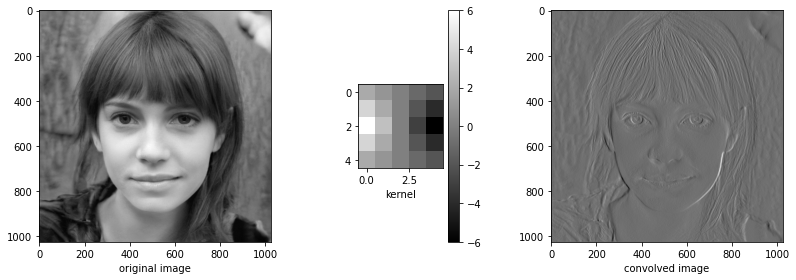

In [ ]:
# Set kernel
a = np.array([[1, 2, 3, 2, 1]])
b = np.array([[2, 1, 0, -1, -2]])

kernel = a.T*b
print(kernel)
#------------------------------------------------------------------------------

# Original image
img = cv2.imread('woman2.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(rgb)
r_n = r/255
image = r

# Convolved image
new_image = convolve(image, kernel)

# Histogram of convolved image
histogram_r, bin_edges_r = np.histogram(new_image, bins=256, range=(0, 255))

# Two column plot (image, histogram)
fig, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1, 3]}, figsize=(12, 4))
a0.imshow(image, cmap = 'gray')
a0.set_xlabel("original image")
a1.imshow(kernel, cmap = 'gray')
a1.set_xlabel("kernel")

pos = a1.imshow(kernel, cmap = 'gray')
fig.colorbar(pos, ax=a1)

a2.imshow(new_image, cmap = 'gray')
a2.set_xlabel("convolved image")
fig.tight_layout()

## Gauss, vagy normális eloszlás alapú (I.)

A súlyok a középpontól távolabb egyre csökkenek, normális eloszlás szerint.

$$
v=
\begin{bmatrix}
0.06136 \\
0.24477 \\
0.38774 \\
0.24477 \\
0.06136
\end{bmatrix}	
$$

$$K_{\text{Gaussian}} = v * v^T$$

[[0.00376505 0.01501909 0.02379173 0.01501909 0.00376505]
 [0.01501909 0.05991235 0.09490712 0.05991235 0.01501909]
 [0.02379173 0.09490712 0.15034231 0.09490712 0.02379173]
 [0.01501909 0.05991235 0.09490712 0.05991235 0.01501909]
 [0.00376505 0.01501909 0.02379173 0.01501909 0.00376505]]


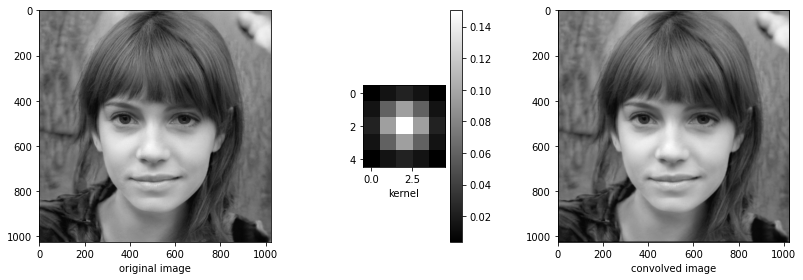

In [ ]:
# 5 x 5 Gauss kernel normális eloszlás táblázat alapján
a = np.array([[0.06136,
               0.24477,
               0.38774,
               0.24477,
               0.06136]])

kernel = a.T*a
print(kernel)
#------------------------------------------------------------------------------

# Original image
img = cv2.imread('woman2.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(rgb)
r_n = r/255
image = r

# Convolved image
new_image = convolve(image, kernel)

# Histogram of convolved image
histogram_r, bin_edges_r = np.histogram(new_image, bins=256, range=(0, 255))

# Two column plot (image, histogram)
fig, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1, 3]}, figsize=(12, 4))
a0.imshow(image, cmap = 'gray')
a0.set_xlabel("original image")
a1.imshow(kernel, cmap = 'gray')
a1.set_xlabel("kernel")

pos = a1.imshow(kernel, cmap = 'gray')
fig.colorbar(pos, ax=a1)

a2.imshow(new_image, cmap = 'gray')
a2.set_xlabel("convolved image")
fig.tight_layout()


## Részlet kiemelés

$$
\
K_{sharp} =
\begin{bmatrix}
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{bmatrix}
+
\begin{bmatrix}
0 & -1 & 0\\
-1 & 1 & -1\\
0 & -1 & 0
\end{bmatrix}
* \text{amount}
\
$$

Ha az $amount$ értéke $1$ akkor

$$
K_{sharp}=
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{bmatrix}	
$$

Ha az $amount$ értéke $0$ akkor a konvolúciónak nincs hatása. Minnél magasabb viszont az érték annál erősebb a hatás.

[[  0. -10.   0.]
 [-10.  41. -10.]
 [  0. -10.   0.]]


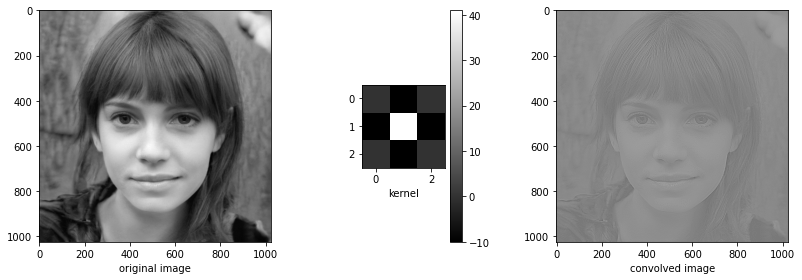

In [ ]:
# 3 x 3 élkiemelés
a = np.zeros([3,3])
a[1,1]=1

b = np.zeros([3,3])
b[0,1] = -1
b[1,0] = -1
b[1,1] =  4
b[1,2] = -1
b[2,1] = -1

amount = 10

kernel = a + b * amount

# kernel = np.array([[  0.0, -10.0,   0.0],
#                    [-10.0,  40.0, -10.0],
#                    [  0.0, -10.0,   0.0]])
print(kernel)
#------------------------------------------------------------------------------

# Original image
img = cv2.imread('woman2.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(rgb)
r_n = r/255
image = r

# Convolved image
new_image = convolve(image, kernel)

# Histogram of convolved image
histogram_r, bin_edges_r = np.histogram(new_image, bins=256, range=(0, 255))

# Two column plot (image, histogram)
fig, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3, 1, 3]}, figsize=(12, 4))
a0.imshow(image, cmap = 'gray')
a0.set_xlabel("original image")
a1.imshow(kernel, cmap = 'gray')
a1.set_xlabel("kernel")

pos = a1.imshow(kernel, cmap = 'gray')
fig.colorbar(pos, ax=a1)

a2.imshow(new_image, cmap = 'gray')
a2.set_xlabel("convolved image")
fig.tight_layout()


## Éldetektálás OpenCV könyvtárral

Ezeket egy másik notebookba teszem, de érdekel, hogy az OpenCv milyen beépített éldetektálásokat alkalmaza, amelyeket idővel át tudok ültetni a saját kódbázisomba is.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%%capture
!wget https://github.com/JoDeMiro/OpenCVTutorial/raw/main/woman2.jpg

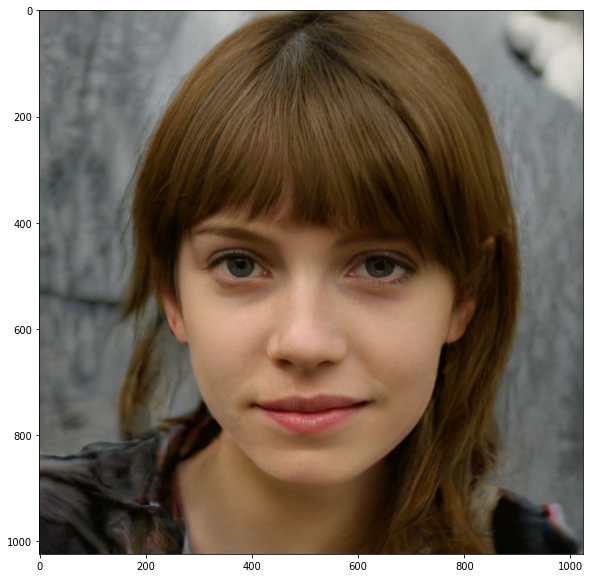

In [3]:
img = cv2.imread('woman2.jpg')

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplots(figsize=(10,10))
plt.imshow(rgb)
plt.show()


## Canny éldetektor




## Ezt úgy kéne megcsinálni, hogy egy kép a nőrőll és egy kép a baktériumokról

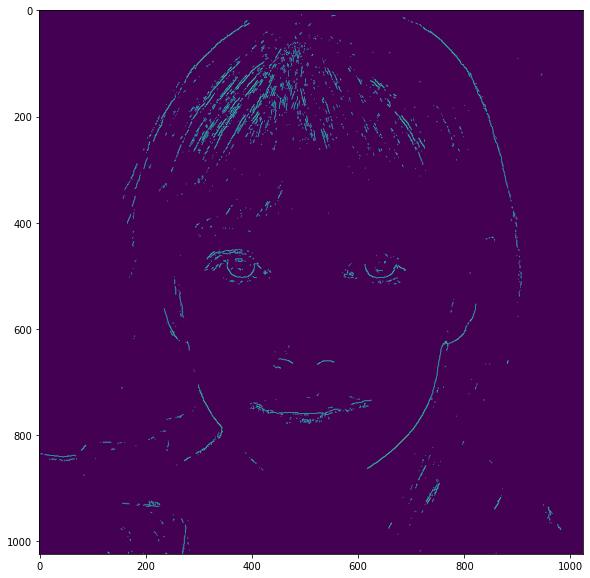

In [5]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)
plt.subplots(figsize=(10,10))
plt.imshow(edges)

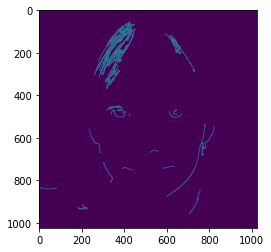

In [6]:
edges = cv2.Canny(image=img, threshold1=0, threshold2=255)
plt.imshow(edges)

## CALCULATE FORMULA FOR EDGES

In [7]:

med_val = np.median(img)
med_val

90.0

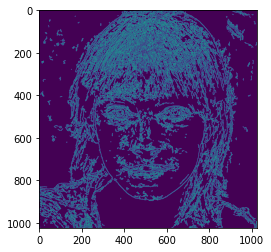

In [8]:
### LOWER THRESHOLD to either 0 or 70% of the median value whichever is greater
lower = int(max(0, 0.7*med_val))

### LOWER THRESHOLD to either 0 or 70% of the median value whichever is greater
upper = int(min(255, 0.3*med_val))

edges = cv2.Canny(image=img, threshold1=lower, threshold2=upper)
plt.imshow(edges)

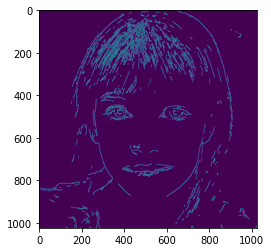

In [9]:
### LOWER THRESHOLD to either 0 or 70% of the median value whichever is greater
lower = int(max(0, 0.7*med_val))

### LOWER THRESHOLD to either 0 or 70% of the median value whichever is greater
upper = int(min(255, 1.3*med_val))

edges = cv2.Canny(image=img, threshold1=lower, threshold2=upper)
plt.imshow(edges)

## Blurring and adding the edges

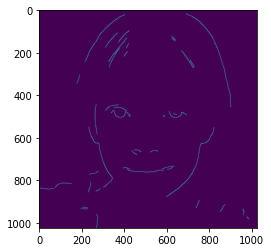

In [10]:
blurred_img = cv2.blur(img, ksize = (5,5))

edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper)
plt.imshow(edges)

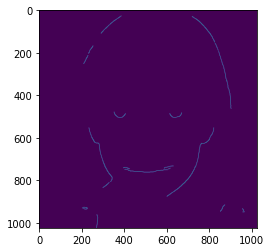

In [11]:

blurred_img = cv2.blur(img, ksize = (7,7))

edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper)
plt.imshow(edges)

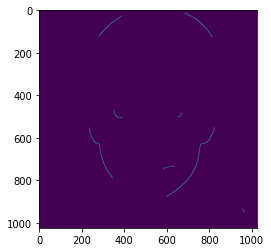

In [12]:

blurred_img = cv2.blur(img, ksize = (6,6))

edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper+50)
plt.imshow(edges)

## Grid Detection

In [13]:
import skimage

In [20]:
# Original image
flat_chess = skimage.data.checkerboard()

flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

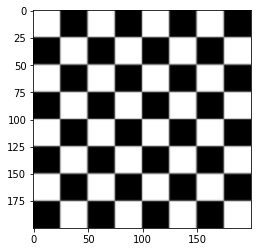

In [21]:

plt.imshow(flat_chess)

## CHESSBOARD CORNERS

True


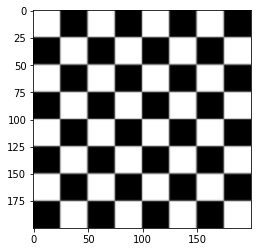

In [24]:
## Finding Corners
found, corners = cv2.findChessboardCorners(flat_chess, (7,7))
plt.imshow(flat_chess)

print(found)


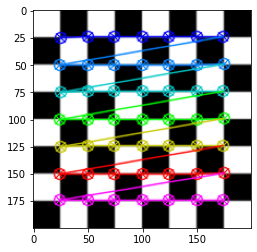

In [25]:
## Drawing on chessboard corners

cv2.drawChessboardCorners(flat_chess, (7,7), corners, found)
plt.imshow(flat_chess)

## New Image for Circles

In [30]:
%%capture
!wget https://github.com/JoDeMiro/ImageProcessing/raw/main/images/dot_grid.png

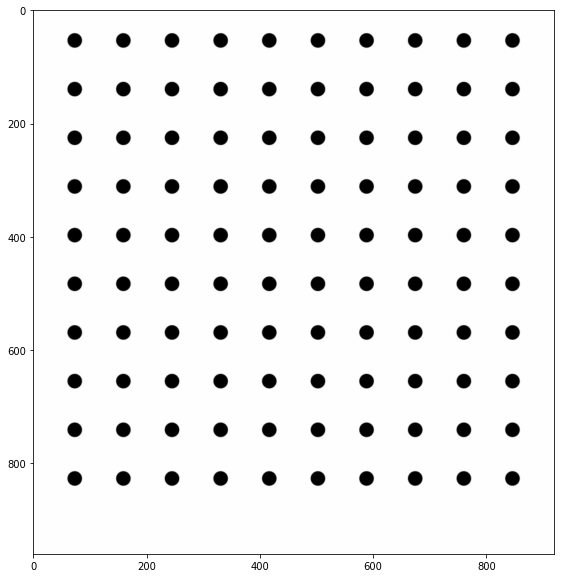

In [31]:
dots = cv2.imread('dot_grid.png')

dots = cv2.cvtColor(dots, cv2.COLOR_BGR2RGB)

plt.subplots(figsize=(10,10))
plt.imshow(dots)
plt.show()

In [32]:
found, corners = cv2.findCirclesGrid(dots, (10, 10), cv2.CALIB_CB_SYMMETRIC_GRID)
found

True

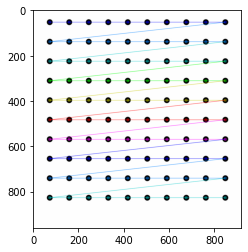

In [33]:

## Drawing on Circle corners

cv2.drawChessboardCorners(dots, (10,10), corners, found)
plt.imshow(dots)

## Finding Contours

In [34]:
%%capture
!wget https://github.com/JoDeMiro/ImageProcessing/raw/main/images/shapes1.png

(202, 330)


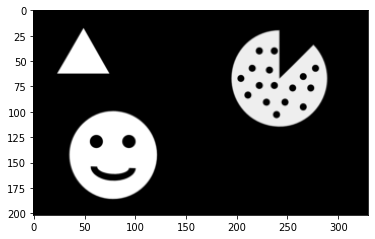

In [37]:
img = cv2.imread('shapes1.png',0)
print(img.shape)
plt.imshow(img, cmap='gray')

In [39]:


contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [40]:
print(type(image))
print(type(contours))
print(type(hierarchy))

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


In [41]:
print(len(image))
print(len(contours))
print(len(hierarchy))

200
22
1


In [42]:
hierarchy ## Array of 22 contour items

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [51]:
external_contours = np.zeros(img.shape)
external_contours.shape

(202, 330)

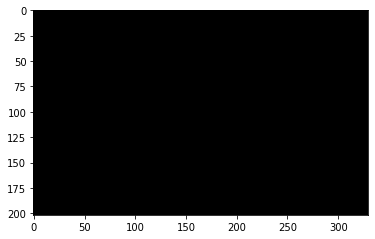

In [52]:
plt.imshow(external_contours, cmap='gray')

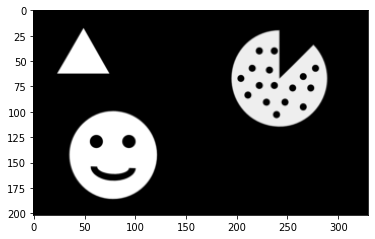

In [53]:
plt.imshow(img, cmap='gray')

In [54]:
list(range(len(contours)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

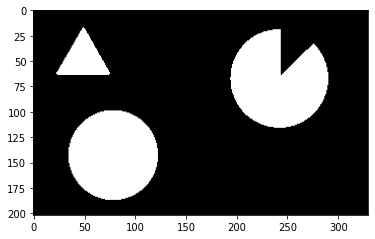

In [55]:
for i in range(len(contours)):
    
    #EXTERNAL
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)
        
plt.imshow(external_contours, cmap='gray')

(202, 330)


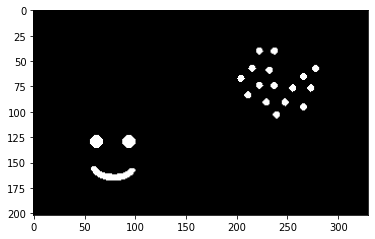

In [56]:
internal_contours = np.zeros(img.shape)
print(internal_contours.shape)

for i in range(len(contours)):
    
    #EXTERNAL
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal_contours, contours, i, 255, -1)
        
plt.imshow(internal_contours, cmap='gray')

(202, 330)


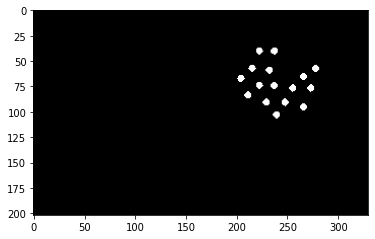

In [57]:
internal_contours = np.zeros(img.shape)
print(internal_contours.shape)

for i in range(len(contours)):
    
    #EXTERNAL
    if hierarchy[0][i][3] == 4:
        cv2.drawContours(internal_contours, contours, i, 255, -1)
        
plt.imshow(internal_contours, cmap='gray')

(202, 330)


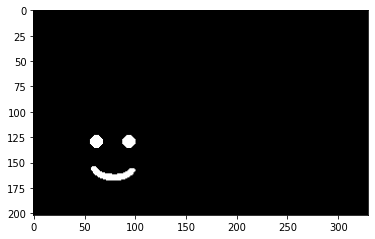

In [58]:
internal_contours = np.zeros(img.shape)
print(internal_contours.shape)

for i in range(len(contours)):
    
    #EXTERNAL
    if hierarchy[0][i][3] == 0:
        cv2.drawContours(internal_contours, contours, i, 255, -1)
        
plt.imshow(internal_contours, cmap='gray')


<a name="felhasznalt-irodalom"></a>

[vissza a tartalomhoz](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhasznált irodalom és internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>


Szegedi Tudományegyetem - Kató Zoltán - Élek detektálása
<br>
https://www.inf.u-szeged.hu/~kato/teaching/segmentation/03_edgedetection.pdf

ELTE Természettudományi Kar, Nagy Sándor - 'Konvolúció'
<br>
http://nagysandor.eu/AsimovTeka/convolution/index.html


------------

Wikipedia - 'Sobel operator'
<br>
https://en.wikipedia.org/wiki/Sobel_operator


How the Sobel Operator Works
<br>
https://automaticaddison.com/how-the-sobel-operator-works/


ScienceDirect - Sobel Operator
<br>
https://www.sciencedirect.com/topics/engineering/sobel-operator


Robert Fisher - Edge Detection
<br>
https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm


Gauss Blur - Gauss élsíimítás
<br>
https://www.taylorpetrick.com/blog/post/convolution-part3

Kép élesítés, élkiemelés
<br>
https://www.taylorpetrick.com/blog/post/convolution-part3


MIT Computer Vision - 2	Discrete	Fourier	Transform
<br>
http://6.869.csail.mit.edu/fa16/lecture/lecture3linearfilters.pdf
